# Determine a disease

Data were collected on 83 patients undergoing corrective spinal surgery
(Bell et al., 1989). The objective was to determine important risk factors
for kyphosis following surgery. The risk factors are age in years, the
starting vertebrae level of the surgery and the number of levels involved. 

We will determine wheather a patient has kyphosis disease using **Decision Tree Classifier** and **Random Forest Classifier**. Then we will compare two methods to find the best for our task. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


The dataset has 4 columns.

**Kyphosis** - a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

**Age** - in months

**Number** - the number of vertebrae involved

**Start** - the number of the first (topmost) vertebra operated on.

We'll just check out a simple pairplot for this small dataset. 

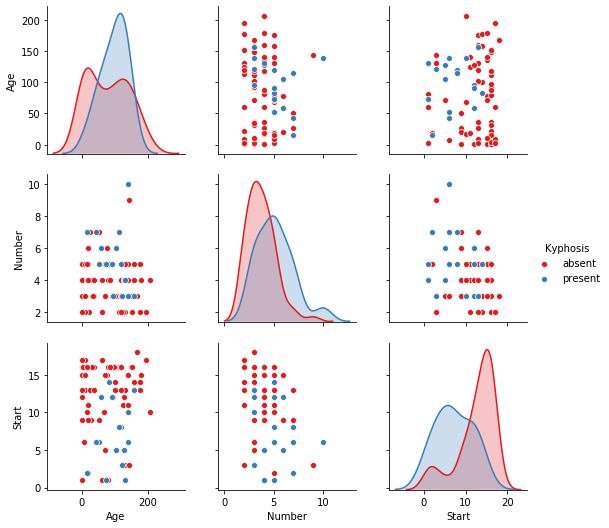

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

We can see distribution of factors and their influence on the disease.

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


### Let's evaluate our decision tree.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

Classification report

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       1.00      0.74      0.85        23
     present       0.25      1.00      0.40         2

    accuracy                           0.76        25
   macro avg       0.62      0.87      0.62        25
weighted avg       0.94      0.76      0.81        25



Confusion matrix

In [14]:
print(confusion_matrix(y_test,predictions))

[[17  6]
 [ 0  2]]


Despite the small number of training data, the simple model was enough precise to determine the disease.

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [22]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

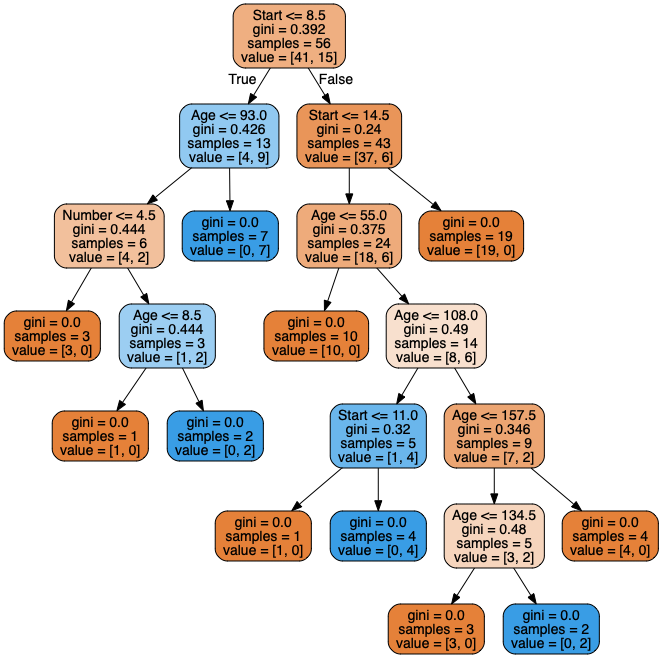

In [23]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rfc_pred = rfc.predict(X_test)

Confusion matrix

In [26]:
print(confusion_matrix(y_test,rfc_pred))

[[20  3]
 [ 1  1]]


Classification report

In [27]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.95      0.87      0.91        23
     present       0.25      0.50      0.33         2

    accuracy                           0.84        25
   macro avg       0.60      0.68      0.62        25
weighted avg       0.90      0.84      0.86        25



Since the dataset is small, it's hard to determine which classifier works better for our task. If we compare based on metrics, Random Forest showed little better result.